<a href="https://colab.research.google.com/github/Dhrubanandi1256/ML_PROJECT/blob/main/fake_news_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
import seaborn as sns

import matplotlib.pyplot as plt
from nltk.stem.porter import  PorterStemmer  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Data Preprocessing


In [ ]:
#loading the dataset to pandas dataframe  
news_dataset = pd.read_csv('/content/train.csv')

In [ ]:
#ROW AND COL 
news_dataset.shape

(20800, 5)

In [ ]:
#print first 5 rows of dataset
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
#count num of missing values in each column
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
#replacing null values with empty string
news_dataset=news_dataset.fillna('')

1    10413
0    10387
Name: label, dtype: int64


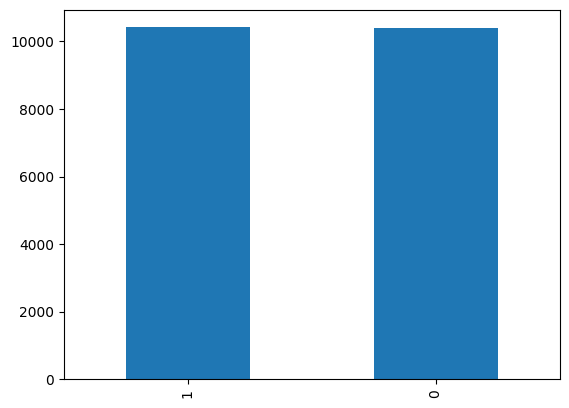

In [ ]:
cnt=news_dataset.label.value_counts()
print(cnt)
news_dataset.label.value_counts().plot(kind='bar')
plt.show()


In [ ]:
i=news_dataset.label.value_counts()

In [ ]:
#merging author name and news title
news_dataset['content']=news_dataset['author']+' '+news_dataset['title']


In [ ]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
#seperating data and label
X = news_dataset.drop(columns='label',axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Stemming:

In [ ]:
port_stem = PorterStemmer()


In [ ]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content =stemmed_content.lower()
  stemmed_content =stemmed_content.split()
  stemmed_content =[ port_stem.stem(word)for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content


In [ ]:
 #content(title+author er opor stemming function apply )
news_dataset ['content'] = news_dataset['content'].apply(stemming)

In [ ]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [ ]:
#seperating the data and label
X= news_dataset['content'].values 
Y= news_dataset['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y)

[1 0 1 ... 0 1 1]


CONVERT TO NUMERICAL DATA

In [ ]:
#convert textual data to numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

Splitting dataset to training and test data

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Training the model:Logistic Regression


In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

Accuracy score


In [ ]:
#accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of traing data:',training_data_accuracy)

Accuracy score of traing data: 0.9865985576923076


In [ ]:
#accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy1=accuracy_score(X_test_prediction,Y_test)


In [ ]:
print('Accuracy score of test data:',test_data_accuracy1)

Accuracy score of test data: 0.9790865384615385


In [ ]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2018
           1       0.99      0.97      0.98      2142

    accuracy                           0.98      4160
   macro avg       0.98      0.98      0.98      4160
weighted avg       0.98      0.98      0.98      4160



Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dt= DecisionTreeClassifier()
Dt.fit(X_train,Y_train)



DecisionTreeClassifier()

In [ ]:
#accuracy score on the training data
X_train_prediction = Dt.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of tarining data:',training_data_accuracy)

Accuracy score of tarining data: 1.0


In [ ]:
#accuracy score on the test data
X_test_prediction = Dt.predict(X_test)
test_data_accuracy2=accuracy_score(X_test_prediction,Y_test)

In [ ]:
print('Accuracy score of test data:',test_data_accuracy2)

Accuracy score of test data: 0.9915865384615384


In [ ]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2084
           1       0.99      0.99      0.99      2076

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
Gb=GradientBoostingClassifier(random_state=0)
Gb.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
#accuracy score on the training data
X_train_prediction = Gb.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 0.9721153846153846


In [ ]:
#accuracy score on the test data
X_test_prediction = Gb.predict(X_test)
test_data_accuracy3=accuracy_score(X_test_prediction,Y_test)

In [ ]:
# accuracy=print('Accuracy score of test data:',test_data_accuracy3)
# print("%.2f" % (accuracy*100))
accuracy = test_data_accuracy3
accuracy_percentage = accuracy * 100

print('Accuracy score of test data:', accuracy)
print('Accuracy percentage:', "%.2f" % accuracy_percentage)

Accuracy score of test data: 0.9675480769230769
Accuracy percentage: 96.75


In [ ]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1962
           1       1.00      0.94      0.97      2198

    accuracy                           0.97      4160
   macro avg       0.97      0.97      0.97      4160
weighted avg       0.97      0.97      0.97      4160



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier(random_state=0)
Rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
#accuracy score on the training data
X_train_prediction = Rf.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [ ]:
print('Accuracy score of training data:',training_data_accuracy)

Accuracy score of training data: 1.0


In [ ]:
#accuracy score on the test data
X_test_prediction = Rf.predict(X_test)
test_data_accuracy4=accuracy_score(X_test_prediction,Y_test)

In [ ]:
# print('Accuracy score of test data:',test_data_accuracy4)
accuracy = test_data_accuracy4
accuracy_percentage = accuracy * 100

print('Accuracy score of test data:', accuracy)
print('Accuracy percentage:', "%.2f" % accuracy_percentage)


Accuracy score of test data: 0.9942307692307693
Accuracy percentage: 99.42


In [ ]:
print(classification_report(X_test_prediction,Y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2071
           1       1.00      0.99      0.99      2089

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160



Visualization

In [ ]:
scoresList = [model,Dt,Rf,Gb]

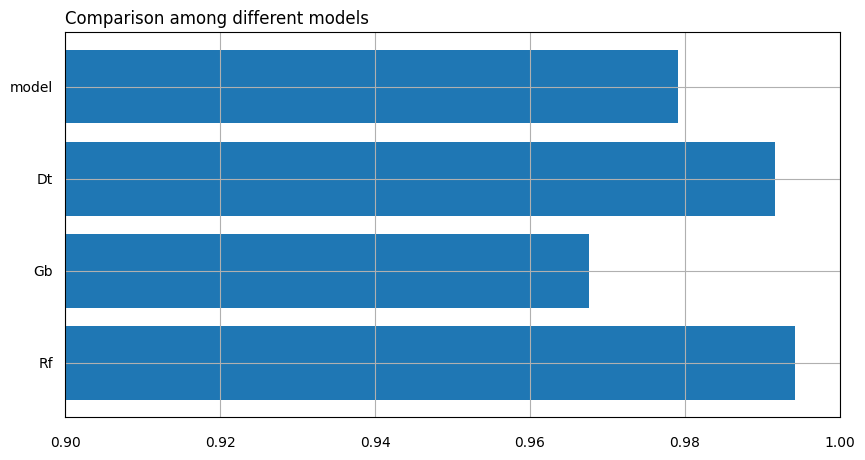

In [ ]:
name = ['model','Dt','Gb','Rf']
score = [test_data_accuracy1,test_data_accuracy2,test_data_accuracy3,test_data_accuracy4]
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 5))
 
# Horizontal Bar Plot
ax.barh(name, score)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 5)
 
# # Add x, y gridlines
# ax.grid(b = True, color ='grey',
#         linestyle ='-.', linewidth = 0.5,
#         alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add Plot Title
ax.set_title('Comparison among different models',
             loc ='left', )


 
# Show Plot
plt.grid(True)
plt.xlim([0.9, 1])
plt.show()

Making a predictive system


In [ ]:
# X_new=X_test[3]
# prediction=Dt.predict(X_new)
# print(prediction)
# if(prediction[0]==0):
#   print('the news is real')
# else:
#   print('the news is fake')

[0]
the news is real


In [ ]:
X_new = X_test[1]
prediction1 = model.predict(X_new)
prediction2 = Dt.predict(X_new)
prediction3 = Gb.predict(X_new)
prediction4 = Rf.predict(X_new)

print(f"Prediction 1: {'real news' if prediction1[0]==0 else 'fake news'}")
print(f"Prediction 2: {'real news' if prediction2[0]==0 else 'fake news'}")
print(f"Prediction 3: {'real news' if prediction3[0]==0 else 'fake news'}")
print(f"Prediction 4: {'real news' if prediction4[0]==0 else 'fake news'}")


Prediction 1: real news
Prediction 2: real news
Prediction 3: real news
Prediction 4: real news


In [ ]:
print(Y_test[1])

0


In [ ]:
news_dataset['content'][0]

'darrel lucu hous dem aid even see comey letter jason chaffetz tweet'

In [ ]:



input_text = str(input())

def pred(input_text):
    input_data = vectorizer.transform([input_text])
    pred_Lr = model.predict(input_data)
    pred_Dt = Dt.predict(input_data)
    pred_Gb = Gb.predict(input_data)
    pred_Rf = Rf.predict(input_data)
    return pred_Lr[0], pred_Dt[0], pred_Gb[0], pred_Rf[0]

if input_text:
    pred_Lr, pred_Dt, pred_Gb, pred_Rf = pred(input_text)
    if pred_Lr == 1 or pred_Dt == 1 or pred_Gb == 1 or pred_Rf == 1:
        print("fake")
    else:
        print("real")


daniel j flynn flynn hillari clinton big woman campu breitbart
real
